In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter    

In [ ]:
df = pd.read_csv("survey.csv")

In [12]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q2_1', 'Q3', 'Q4', 'Q5_1',
       'Q5_2', 'Q5_3'],
      dtype='object')

In [46]:
ans = [i for i in range(3, 33)]

In [68]:
question_ans = [0] + ans

In [69]:
data = df.iloc[ans, 17:]

In [62]:
ov = df.iloc[question_ans, 17:]

In [57]:
q1 = df.loc[3:,"Q1"]
q1

3                   Engineering Major
4                                 NaN
5                   Engineering Major
6     Liberal Arts and Sciences Major
7                      Business Major
8     Liberal Arts and Sciences Major
9                   Engineering Major
10                  Engineering Major
11                  Engineering Major
12           Health Professions Major
13                  Engineering Major
14                  Engineering Major
15                  Engineering Major
16           Health Professions Major
17    Liberal Arts and Sciences Major
18                     Business Major
19    Liberal Arts and Sciences Major
20    Liberal Arts and Sciences Major
21                  Engineering Major
22                  Engineering Major
23    Liberal Arts and Sciences Major
24                  Engineering Major
25                  Engineering Major
26                  Engineering Major
27                  Engineering Major
28                  Engineering Major
29          

In [58]:
q1_counts = q1.value_counts()
q1_counts

Q1
Engineering Major                  18
Liberal Arts and Sciences Major     6
Business Major                      3
Health Professions Major            2
Name: count, dtype: int64

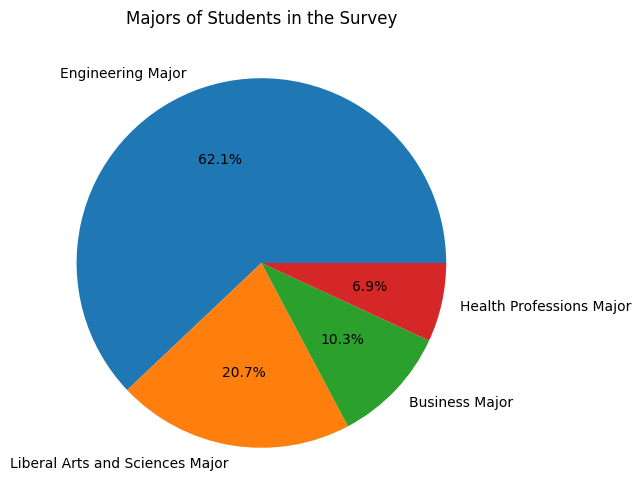

In [ ]:
q1_counts = q1.value_counts()
q1_counts
q1_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Majors of Students in the Survey') 
plt.ylabel('')  # Remove the y-axis label for better appearance
plt.show()

In [79]:
q1_counts

Q1
Engineering Major                  18
Liberal Arts and Sciences Major     6
Business Major                      3
Health Professions Major            2
Name: count, dtype: int64

In [80]:
eng = df[df["Q1"] == "Engineering Major"]
lib = df[df["Q1"] == "Liberal Arts and Sciences Major"]
bus = df[df["Q1"] == "Business Major"]
health = df[df["Q1"] == "Health Professions Major"]

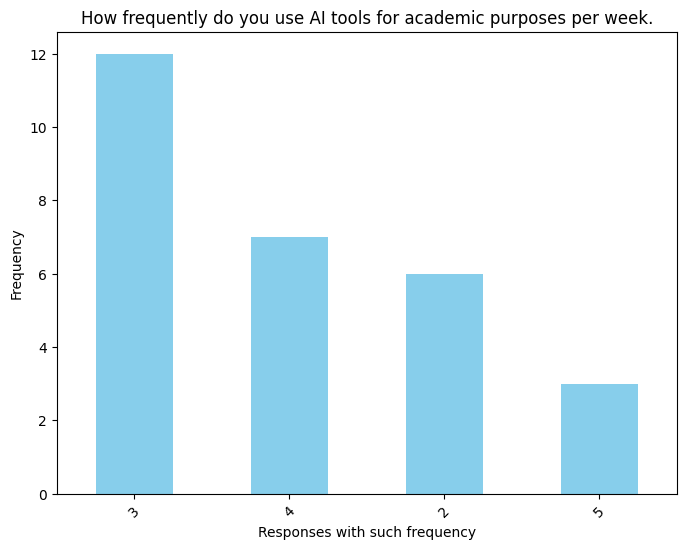

In [ ]:
ai_tools_counts = data['Q2_1'].value_counts()

# Create a bar chart
ai_tools_counts.plot.bar(figsize=(8, 6), color='skyblue', title='How frequently do you use AI tools for academic purposes per week.')
plt.xlabel('Responses with such frequency')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [140]:
def freq(data, title, col):
        ai_tools_counts = data[col].value_counts()

        # Create a bar chart
        ai_tools_counts.plot.bar(figsize=(8, 6), color='skyblue', title=title)
        plt.xlabel('Responses with such frequency')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

def freq_multiple(majors, col):
    for major in majors:
        freq(major, title=f"How frequently do you use AI tools for academic purposes per week. {major['Q1'].values[0]}", col=col)

def o_freq_multiple(majors, col, title):
    for major in majors:
        freq(major, title=f"{title}. {major['Q1'].values[0]}", col=col)

In [86]:
majors = [eng, lib, bus, health]

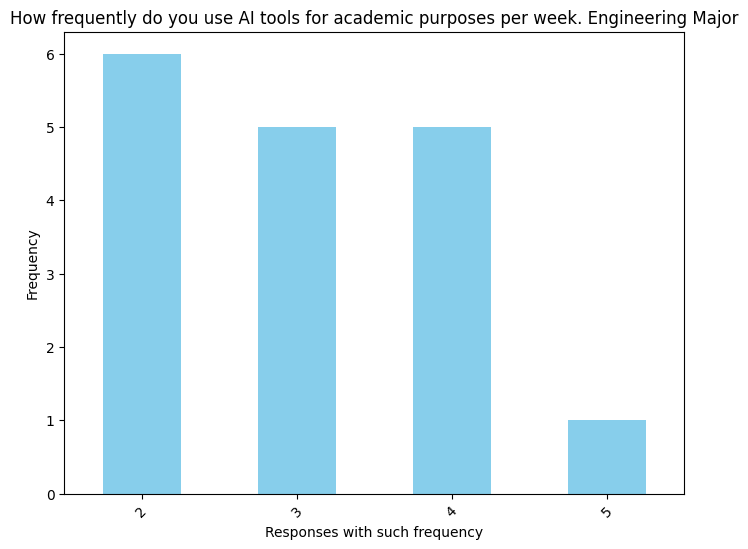

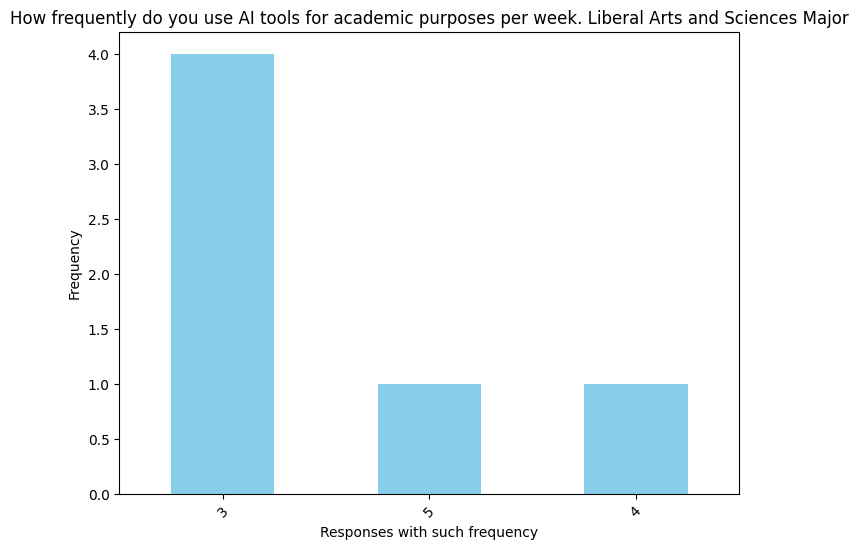

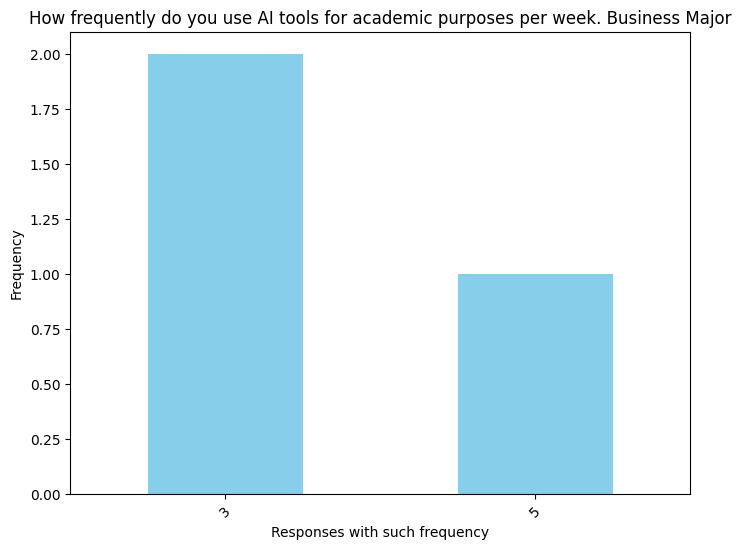

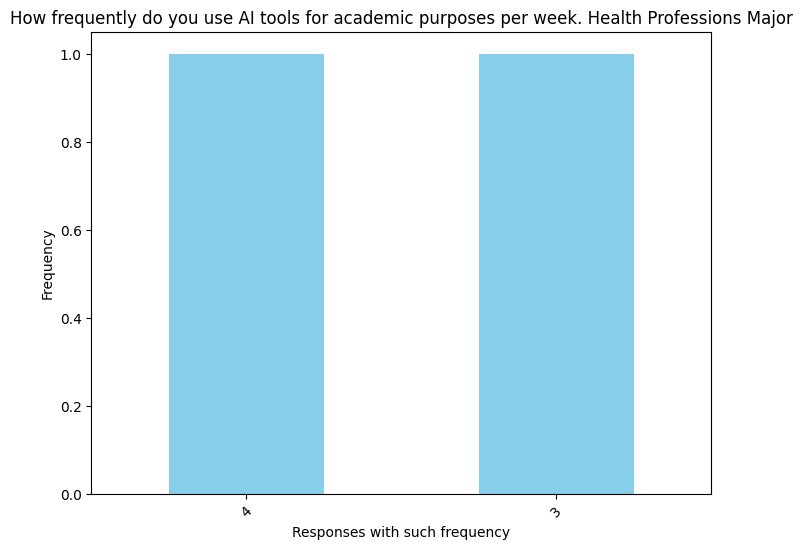

In [97]:
freq_multiple(majors, 'Q2_1')

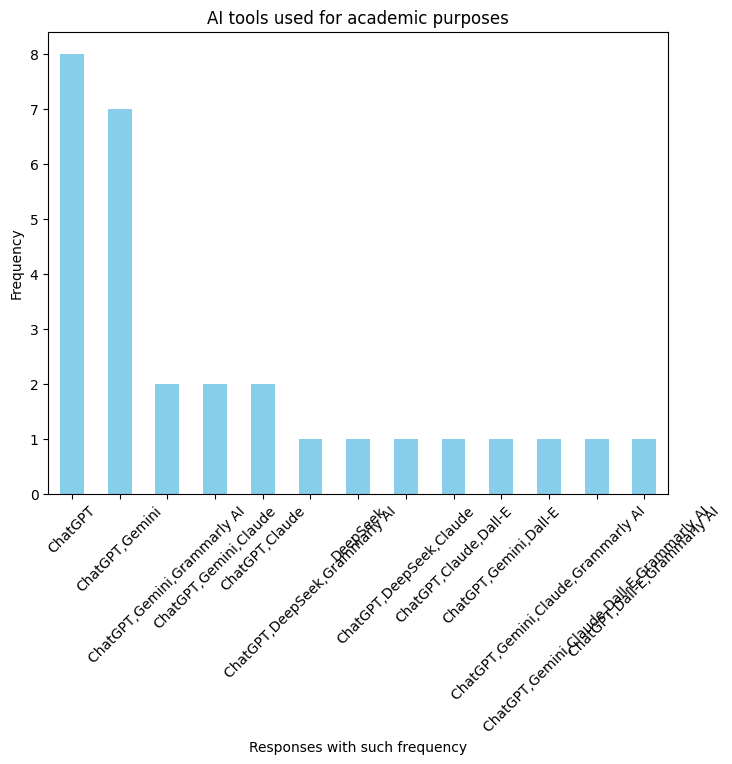

In [98]:
freq(data, title="AI tools used for academic purposes", col="Q3")

In [109]:
def count_multiple_choices(series):
    # Initialize a Counter
    counter = Counter()
    
    # Iterate through each response
    for response in series:
        # Skip NaN values
        if pd.isna(response):
            continue
        
        # Split by comma and strip whitespace
        choices = [choice.strip() for choice in response.split(',')]
        
        # Update counter with each individual choice
        counter.update(choices)
    
    # Convert counter to DataFrame for better visualization
    result = pd.DataFrame({
        'Option': list(counter.keys()),
        'Count': list(counter.values())
    }).sort_values('Count', ascending=False).reset_index(drop=True)
    
    return result

# Apply the function to your column
q3res = count_multiple_choices(data['Q3'])
print(q3res)

# You can also calculate percentages based on total responses
total_responses = len(data)
q3res['Percentage'] = (q3res['Count'] / total_responses * 100).round(1)
print("\nWith percentages:")
print(q3res)

# If you want to know what percentage of respondents chose each option
q3res['Respondent_Percentage'] = (q3res['Count'] / total_responses * 100).round(1)
print("\nPercentage of respondents who selected each option:")
print(q3res)

         Option  Count
0       ChatGPT     28
1        Gemini     14
2        Claude      8
3  Grammarly AI      6
4        Dall-E      4
5      DeepSeek      3

With percentages:
         Option  Count  Percentage
0       ChatGPT     28        93.3
1        Gemini     14        46.7
2        Claude      8        26.7
3  Grammarly AI      6        20.0
4        Dall-E      4        13.3
5      DeepSeek      3        10.0

Percentage of respondents who selected each option:
         Option  Count  Percentage  Respondent_Percentage
0       ChatGPT     28        93.3                   93.3
1        Gemini     14        46.7                   46.7
2        Claude      8        26.7                   26.7
3  Grammarly AI      6        20.0                   20.0
4        Dall-E      4        13.3                   13.3
5      DeepSeek      3        10.0                   10.0


In [110]:
q3res

,Option,Count,Percentage,Respondent_Percentage
0,ChatGPT,28,93.3,93.3
1,Gemini,14,46.7,46.7
2,Claude,8,26.7,26.7
3,Grammarly AI,6,20.0,20.0
4,Dall-E,4,13.3,13.3
5,DeepSeek,3,10.0,10.0


In [112]:
def bar(results, title, xlabel, ylabel):
    # Now create a bar graph
    plt.figure(figsize=(10, 6))

    # Set the style
    sns.set_style("whitegrid")

    # Create the bar plot
    ax = sns.barplot(x='Option', y='Count', data=results, palette='viridis')

    # Add count labels on top of each bar
    for i, v in enumerate(results['Count']):
        ax.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

    # Add percentage labels below the count
    for i, (v, p) in enumerate(zip(results['Count'], results['Percentage'])):
        ax.text(i, v/2, f"{p}%", ha='center', color='white', fontweight='bold')

    # Set title and labels
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Adjust layout
    plt.tight_layout()

    # Optional: Add a text explanation of the data
    total_selections = sum(results['Count'])
    plt.figtext(0.5, 0.01, 
                f"Total selections: {total_selections} from {total_responses} respondents", 
                ha="center", fontsize=10, style='italic')

    # Show the plot
    plt.show()


C:\Users\mauri\AppData\Local\Temp\ipykernel_7312\1427901154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Option', y='Count', data=results, palette='viridis')


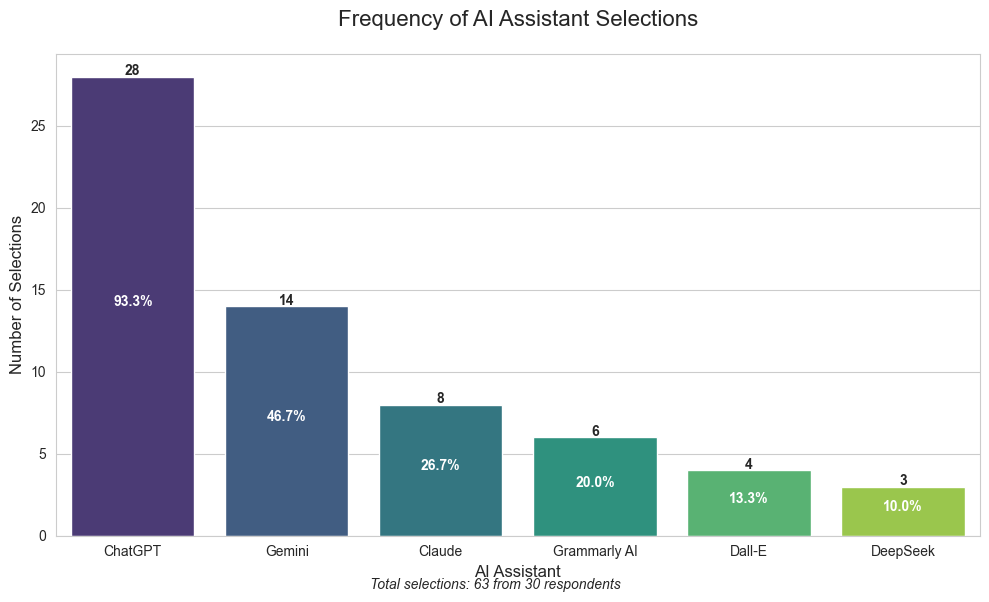

In [113]:
bar(q3res, 'Frequency of AI Assistant Selections', 'AI Assistant', 'Number of Selections')

In [106]:
data["Q4"]

3     Writing and Editing (generating outlines, draf...
4     Studying and Note-Taking (summarizing lecture ...
5     Writing and Editing (generating outlines, draf...
6     Writing and Editing (generating outlines, draf...
7     Writing and Editing (generating outlines, draf...
8     Writing and Editing (generating outlines, draf...
9     Writing and Editing (generating outlines, draf...
10    Writing and Editing (generating outlines, draf...
11    Writing and Editing (generating outlines, draf...
12    Writing and Editing (generating outlines, draf...
13    Writing and Editing (generating outlines, draf...
14    Writing and Editing (generating outlines, draf...
15    Research and Information Gathering (searching ...
16    Writing and Editing (generating outlines, draf...
17    Writing and Editing (generating outlines, draf...
18    Writing and Editing (generating outlines, draf...
19    Research and Information Gathering (searching ...
20    Writing and Editing (generating outlines, 

In [116]:
q4res = count_multiple_choices(data['Q4'])
q4res

,Option,Count
0,Writing and Editing (generating outlines,24
1,checking grammar and spelling),24
2,drafts,24
3,summarizing academic sources),21
4,Research and Information Gathering (searching ...,21
5,explaining word problems),18
6,Math and Problem Solving (solving math problems,18
7,generating proofs,18
8,Studying and Note-Taking (summarizing lecture ...,16
9,generating flashcards,16


In [126]:
def truncate_column_names(df, column):
    df = df.copy()
    df[column] = df[column].astype(str).str.split(' (').str[0]
    return df

C:\Users\mauri\AppData\Local\Temp\ipykernel_7312\1427901154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Option', y='Count', data=results, palette='viridis')


KeyError: 'Percentage'

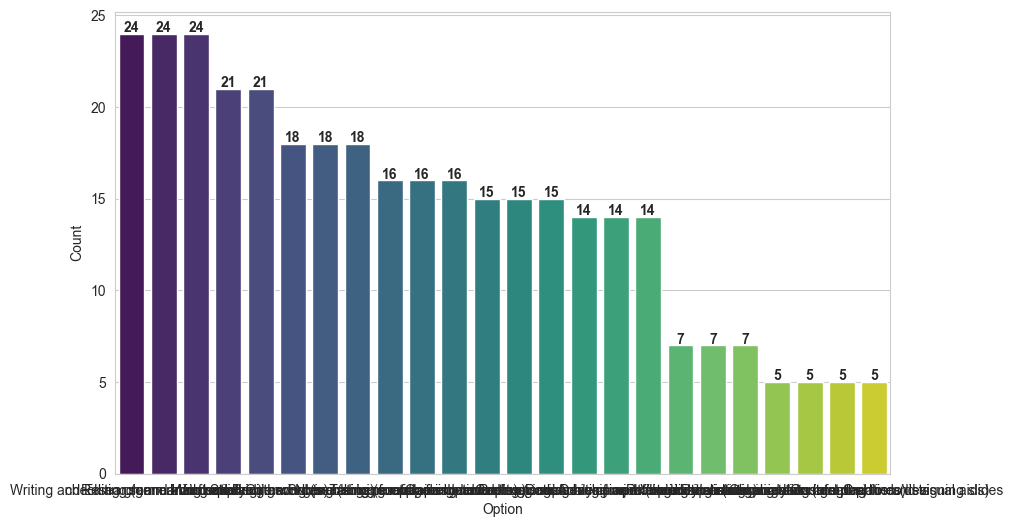

In [129]:
bar(q4res, 'Frequency of AI Tools Used for Academic Purposes', 'AI Tool', 'Number of Selections')

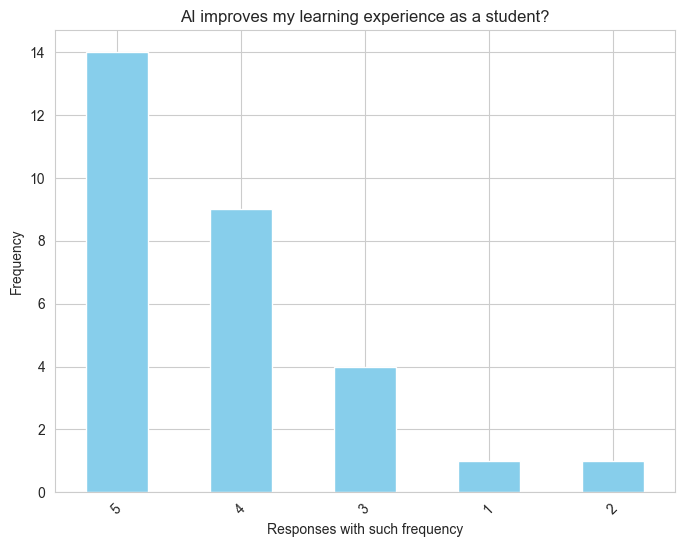

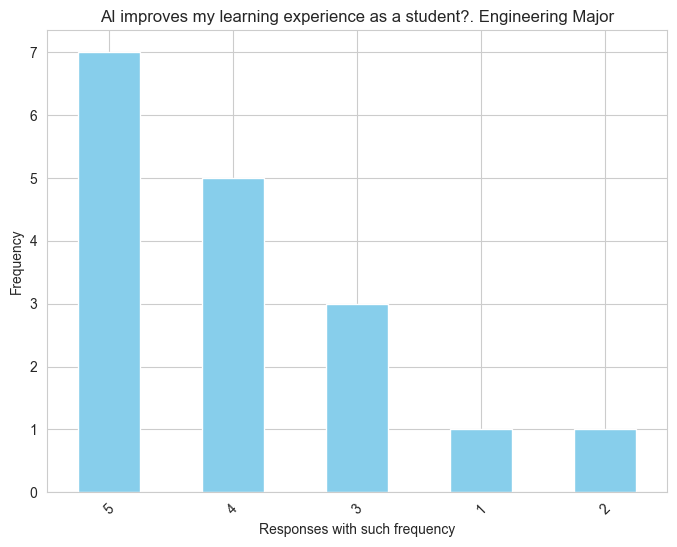

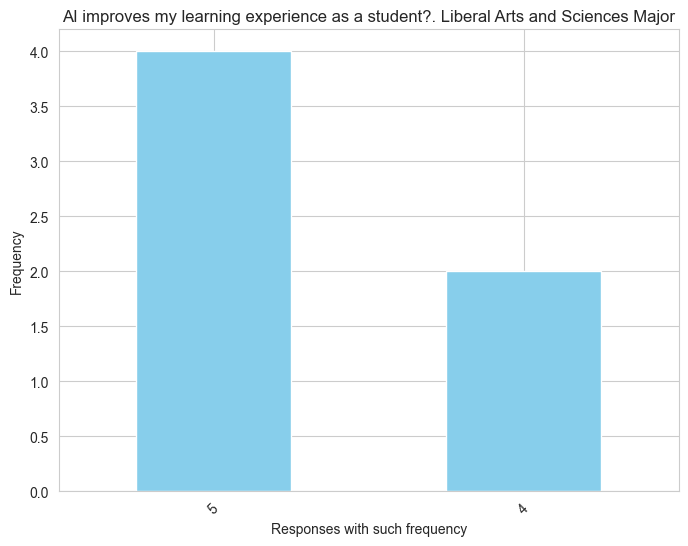

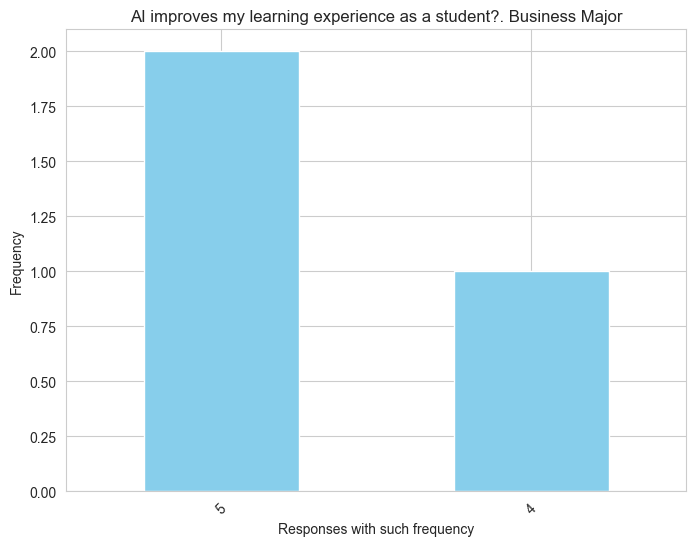

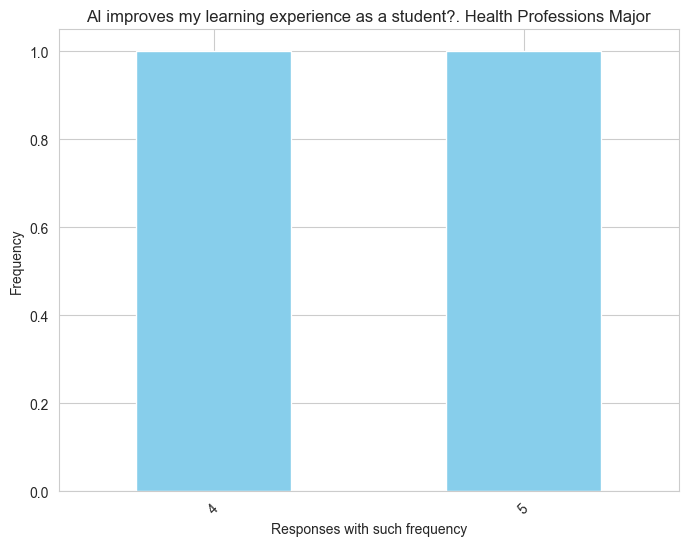

In [141]:
freq(data, title="AI improves my learning experience as a student?", col="Q5_1")
o_freq_multiple(majors, col="Q5_1", title="AI improves my learning experience as a student?")

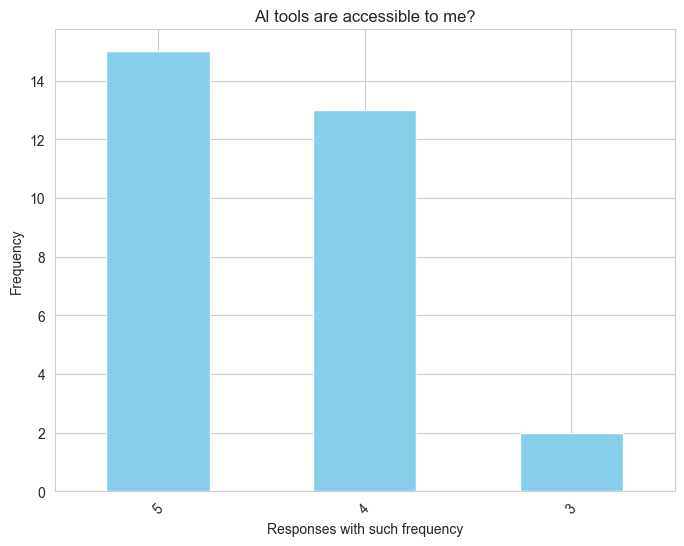

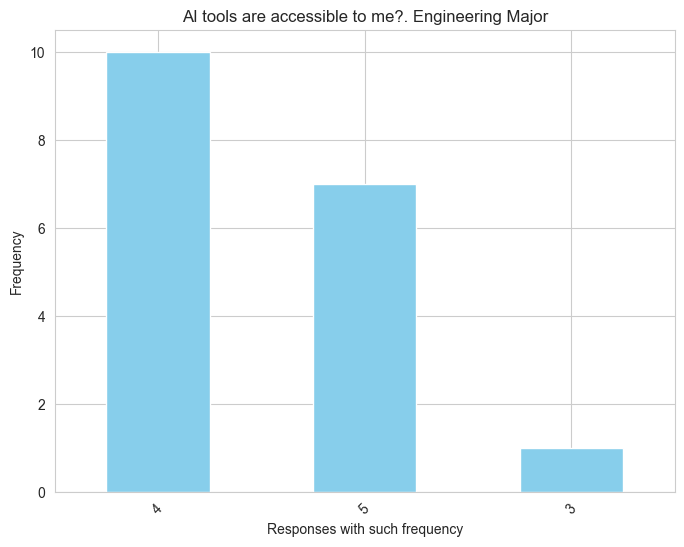

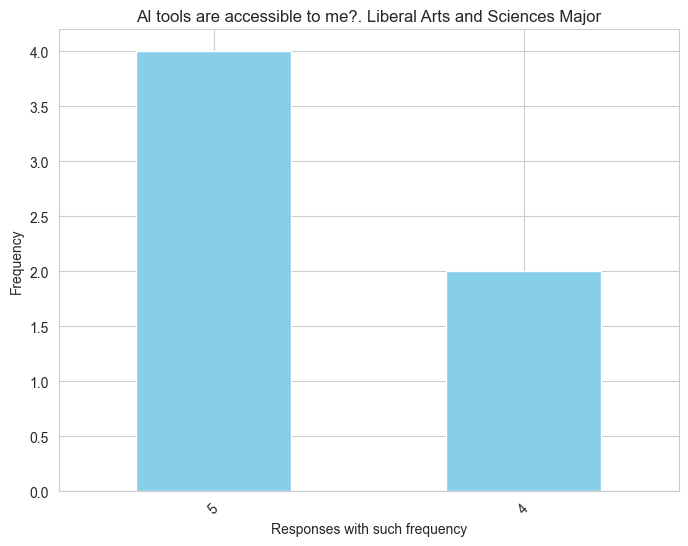

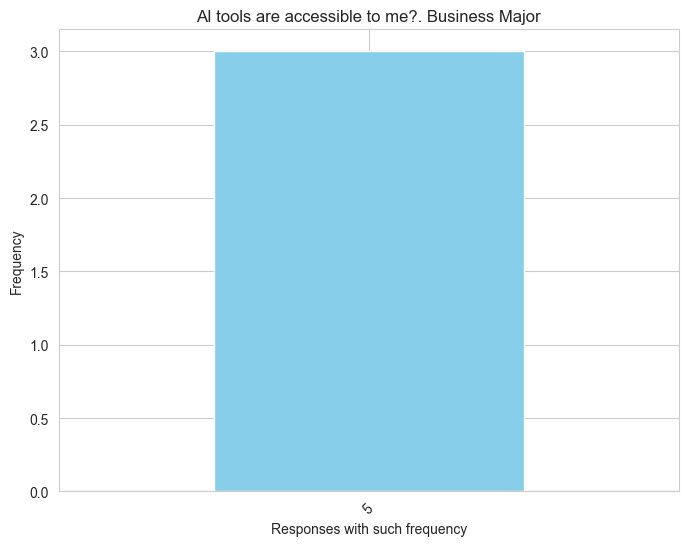

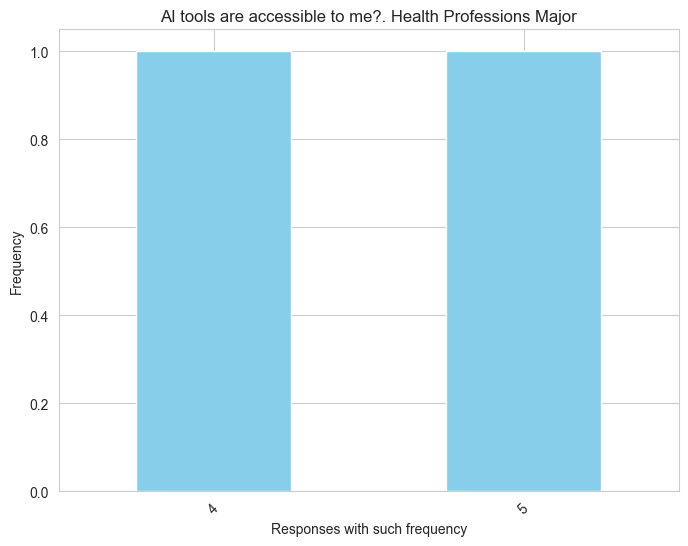

In [142]:
freq(data, title="AI tools are accessible to me?", col="Q5_2")
o_freq_multiple(majors, col="Q5_2", title="AI tools are accessible to me?")

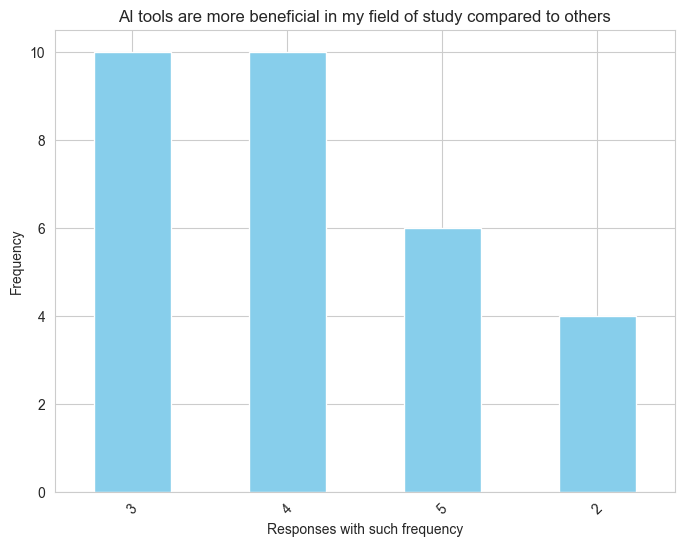

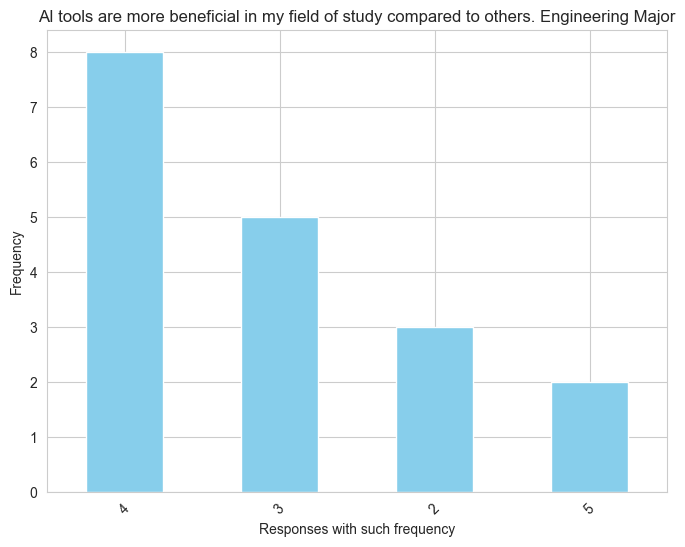

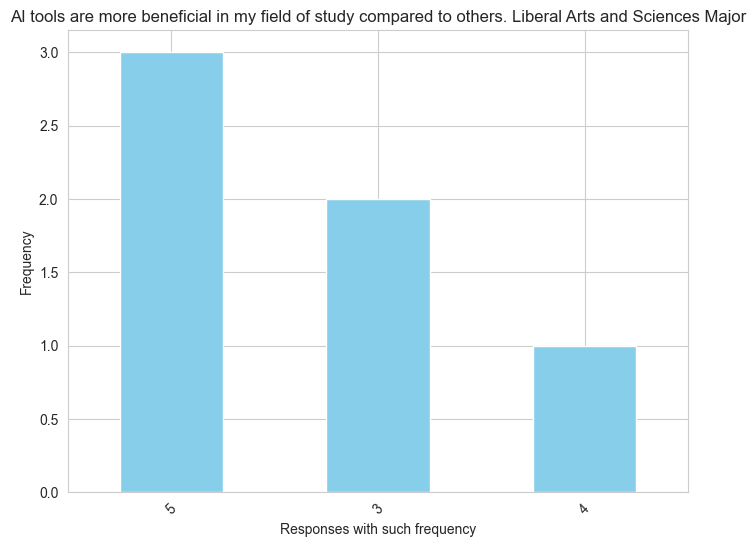

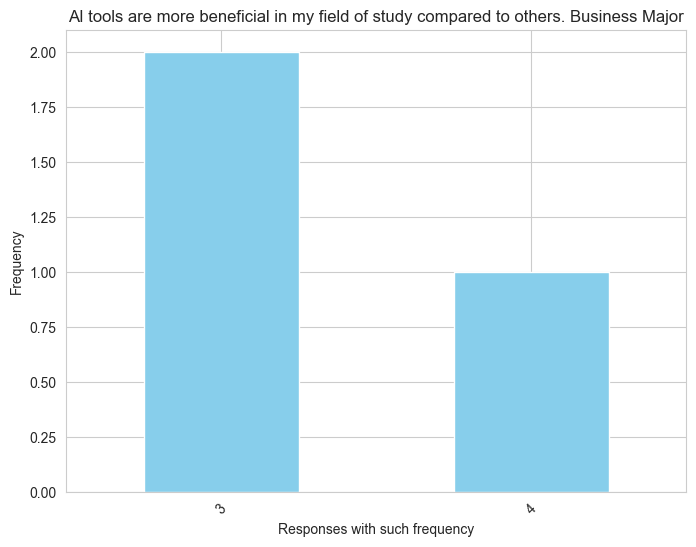

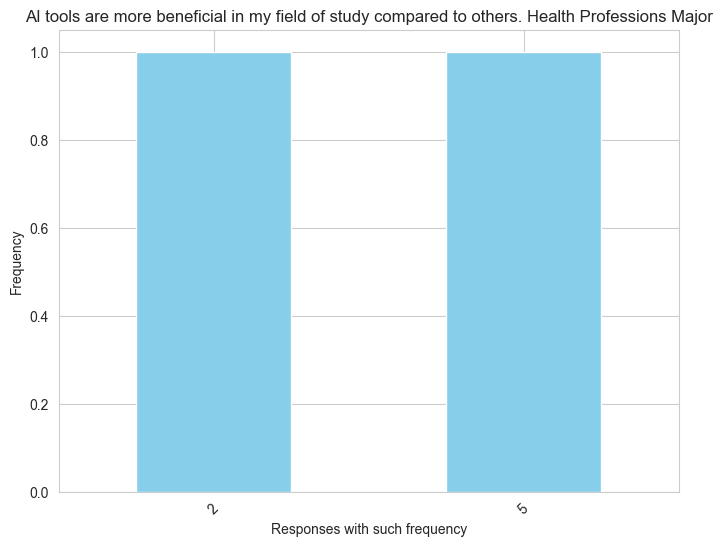

In [143]:
freq(data, title="AI tools are more beneficial in my field of study compared to others", col="Q5_3")
o_freq_multiple(majors, col="Q5_3", title="AI tools are more beneficial in my field of study compared to others")